

# Projet P5 - Optimisez la gestion des données d'une boutique avec R ou Python

*OPENCLASSROOMS - Parcours Data Analyst V2 - Adeline Le Ray - Novembre 2022*
<hr>

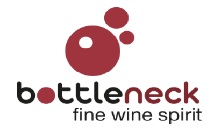
## <font color='blue'>*Sommaire*</font>
**[Présentation du projet](#Presentation_projet)**
* [1. Rappel du contexte](#0_1)
* [2. Données sources](#0_2)
* [3. Objectifs de la mission](#0_3)
* [4. Analyses à réaliser](#0_4)
* [5. Démarche](#0_5)

**[Partie 1 - Importation et Inspection des fichiers de données](#partie1)**
* [1. Importation des librairies"](#1_1)
* [2. Importation et inspection des fichiers de données](#1_2)
    * [a. Fichier export de l'ERP : 'erp'](#1_2_1)
    * [b. Fichier export du CMS, boutique en ligne : 'web'](#1_2_2)
    * [c. Fichier de liaison 'liaison'](#1_2_3)

**[Partie 2 - Nettoyage des données](#partie2)**
* [1. Types de variables](#2_1)
    * [a. Data frame 'erp'](#2_1_1)
    * [b. Data frame 'web'](#2_1_2)
    * [c. Data frame 'liaison'](#2_1_3)
* [2. Valeurs manquantes](#2_2)
    * [a. Data frame 'erp'](#2_2_1)
    * [b. Data frame 'web'](#2_2_2)
    * [c. Data frame 'liaison'](#2_2_3)
* [3. Doublons](#2_3)
* [4. Changement nom colonne 'id_web' en 'sku' dans le df 'liaison' ](#2_4)
    
**[Partie 3 - Analyses des données](#partie3)**
* [1. Jointure entre les exports de l'ERP et du CMS en utilisant le fichier 'liaison'](#3_1)
    * [a. Vérification de l'unicité des clés primaires pour les jointures'](#3_1_1)
    * [b. Jointure entre les 'erp' et 'liaison'](#3_1_2)
    * [c. Jointure entre les  df 'erp'/'liaison' et 'web'](#3_1_3)
    
* [2. Chiffres d'affaires par produit et chiffre d'affaire global réalisé en ligne](#3_2)
    * [a. Chiffres d'affaires par produit](#3_2_1)
    * [b. Chiffre d'affaires total réalisé en ligne](#3_2_2)
    * [c. Top des ventes par produit](#3_2_3)
* [3. Analyse des prix de ventes produits](#3_3)
    * [a. Données statistiques et premières visualisations](#3_3_1)
    * [b. Détermination des outliers : méthode des écarts interquartiles](#3_3_2)
    * [c. Détermination des outliers : méthode du Z-score](#3_3_3)
    * [d. Conclusion : liste des potentiels outliers](#3_3_4)
    * [e. Analyse des potentiels outliers](#3_3_5)
   


## <font color='blue'>*Présentation du projet*<a class="anchor" id="Presentation_projet"></a></font>

### 1. Rappel du contexte<a class="anchor" id="0_1"></a>

Je commence ma mission au sein de l'équipe Service Numérique en tant que data analyst freelance chez BottleNeck, un marchand de vin très prestigieux. Laurent est mon manager pour cette mission.

### 2. Données sources<a class="anchor" id="0_2"></a>
Les fichiers utilisés sont les suivants:
- 'erp.xlsx': export de l’ERP contenant les références produit, leur prix de vente et leur état de stock
- 'web.xlsx': export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes pour chaque produit depuis sa mise en ligne, ...)
- 'liaison.xlsx': lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU)

*ERP = Entreprise Ressource Planning*

*CMS = Content Management System*

### 3. Objectifs de la mission<a class="anchor" id="0_3"></a>
La mission a pour objectif :
1. Effectuer un rapprochement des exports de l'ERP,  fichier 'erp.xlsx' et de la boutique en ligne 'web.xlsx' en utilisant le fichier 'liaison.xlsx' 
2. Définir le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne
3. Identifier les erreurs de saisie de certains prix des produits: effectuer une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.


### 5. Démarche<a class="anchor" id="0_5"></a> 
La démarche utilisée pour réaliser le projet se découpe en 3 parties :

1. Importation et inspection des fichiers de données
2. Nettoyage des données
3. Analyse des données

Les différentes parties sont détaillées ci-dessous.

*Nota : df = data frame dans le notebook*

## <font color='blue'>*Partie 1 - Importation et inspection des fichiers de données*<a class="anchor" id="partie1"></a></font>

### 1. Importation des librairies

In [1]:
# Importation des librairies pandas, numpy, pyplot de matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### 2. Importation et inspection des fichiers de données<a class="anchor" id="1_2"></a>

La démarche de l'inspection des fichiers de données est la suivante :
* Importation
* Aperçu du data frame
* Dimension du data frame

*Nota : les fichiers excel ont été convertis en .csv pour l'importation.*

#### a. Fichier export de l'ERP : 'erp'<a class="anchor" id="1_2_1"></a>

In [2]:
df_erp=pd.read_csv('erp.csv', delimiter=';')
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [3]:
df_erp.shape

(825, 5)

**Le fichier 'erp' comprend 5 colonnes:** 
- 'product_id' : identifiant du produit
- 'onsale_web' : produit en vente en ligne
- 'price' : prix unitaire
- 'stock_quantity' : quantité en stock
- stock_status' : en stock ou rupture

#### b. Fichier export du CMS, boutique en ligne : 'web'<a class="anchor" id="1_2_2"></a>

In [4]:
df_web=pd.read_csv('web.csv',encoding = "ISO-8859-1", delimiter=';')#Erreur avec l'encoding 'utf_8' pour ce fichier
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [5]:
df_web.shape

(1513, 28)

**Le fichier 'web' comprend 28 colonnes dont :** 
- 'sku' : identifiant du produit
- 'total_sales' : quantité vendue 
- 'post_date' : date du post
- 'post_name' : nom du produit

#### c. Fichier de liaison entre les 2 exports 'liaison'<a class="anchor" id="1_2_3"></a>

In [6]:
df_liaison=pd.read_csv('liaison.csv', delimiter=';')
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [7]:
df_liaison.shape

(825, 2)

**Le fichier 'liaison' comprend 2 colonnes :** 
- 'product_id' : identifiant du produit dans l'erp
- 'id_web' : identifiant du produit dans la boutique en ligne, = sku 

## <font color='blue'>*Partie 2 - Nettoyage des données* <a class="anchor" id="partie2"></a></font>

La partie Nettoyage des données comprend les étapes suivantes :
* [1. Types de variables](#2_1)
* [2. Valeurs manquantes](#2_2)
* [3. Doublons](#2_3)
* [4. Changement nom colonne 'id_web' en 'sku' dans le fichier 'liaison' ](#2_4)


### 1. Types de variables<a class="anchor" id="2_1"></a>

L'objectif est de vérifier que les variables sont bien du bon type et de corriger les erreurs éventuelles.

#### Data Frame 'erp'<a class="anchor" id="2_1_1"></a>

In [8]:
#Types de variables dans le df 'erp'
df_erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

Pas d'erreur de type sur le df 'erp'

#### Data Frame 'web'<a class="anchor" id="2_1_2"></a>

In [9]:
#Types de variables dans le df 'web'
df_web.dtypes

sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object

La variable 'sku' est de type 'object' car elle contient des chaînes de caractères et des valeurs numériques.

Les variables de dates ne sont pas considérées comme telles.

In [10]:
#Conversion en format date des variables 'post_date', 'post_date_gmt', 'post_modified' et 'post_modified_gmt'
df_web['post_date']=pd.to_datetime(df_web['post_date'])
df_web['post_date_gmt']=pd.to_datetime(df_web['post_date_gmt'])
df_web['post_modified']=pd.to_datetime(df_web['post_modified'])
df_web['post_modified_gmt']=pd.to_datetime(df_web['post_modified_gmt'])
df_web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


#### Data frame 'liaison'<a class="anchor" id="2_1_3"></a>

In [11]:
#Types de variables dans le df 'liaison'
df_liaison.dtypes

product_id     int64
id_web        object
dtype: object

Pas d'erreur de type de variables dans le df 'liaison'

### 2. Valeurs manquantes<a class="anchor" id="2_2"></a>

L'objectif est d'identifier les éventuelles valeurs manquantes et de définir le traitement à effectuer.

#### a. Data frame 'erp'<a class="anchor" id="2_2_1"></a>

In [12]:
# affichage du nombre de valeurs manquantes pour chaque colonne
df_erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

Il n'y a pas de valeur manquante dans le data frame 'erp'

#### b. Data frame 'web'<a class="anchor" id="2_2_2"></a>

In [13]:
# affichage du nombre de valeurs manquantes
nb_na=df_web.isna().sum()
nb_na.loc[nb_na>0]

sku                        85
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

- <font color='red'>Il y a de nombreuses valeurs manquantes notamment : 
    - sku : 85
    - total_sales: 83 </font>

L'identifiant produit 'sku' et la quantité vendue 'total_sales' sont des informations importantes pour l'analyse du chiffre d'affaires et des ventes. 

- Les colonnes 'tax_class', 'post_content', 'post_password', 'post_content_filtered' sont vides. Ces colonnes ne sont pas à conserver car elles ne contiennent aucune information.

##### Traitement des 'sku' NaN
Inspecter les lignes avec 'sku' NaN pour voir si toutes les variables sont NaN. Il y a 85 'sku' NaN et 83 autres variables NaN, peut-être des informations sont elles disponibles pour complèter les NaN de la colonne 'sku'.

In [14]:
#Inspection des lignes de 'sku' NaN 
sku_na=df_web.loc[df_web['sku'].isna(),:]
sku_na

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Recherche sur les autres colonnes de valeurs non NaN dans la sélection sku_na
sku_na.loc[~sku_na['average_rating'].isna(),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Pour ces 2 lignes, le 'sku' est NaN et plusieurs autres variables ne sont pas manquantes. Le 'post_name' devrait permettre de retrouver le 'sku' du produit.

In [16]:
#Recherche des autres lignes avec 'post_name' = 'pierre-jean-villa-cote-rotie-fongeant-2017' et 'pierre-jean-villa-condrieu-suspendu-2018'
df_web.loc[df_web['post_name']=='pierre-jean-villa-cote-rotie-fongeant-2017',:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [17]:
df_web.loc[df_web['post_name']=='pierre-jean-villa-condrieu-suspendu-2018',:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Il n'est pas possible ici de retrouver l'identifiant 'sku'.

<font color='red'>Il s'agit d'une erreur d'enregistrement des données => à signaler pour correction.</font>

In [18]:
#Pourcentage de la variable 'sku' qui est null
round(df_web['sku'].isna().mean()*(100),2)

5.62

Les valeurs NaN de la variable 'sku' représentent 5,6% des données et sont à supprimer du data frame pour l'analyse.

In [19]:
#Sélection des  lignes sku non NaN
df_web=df_web.loc[df_web['sku'].notna()]

#valeurs manquantes sur l'échantillon restant
nb_na=df_web.isna().sum()
nb_na.loc[nb_na>0]

tax_status                714
tax_class                1428
post_content             1428
post_excerpt              714
post_password            1428
post_content_filtered    1428
post_mime_type            714
dtype: int64

In [20]:
print("Après suppression des lignes avec un 'sku' NaN, le data frame web a pour dimensions :"+str(df_web.shape))

Après suppression des lignes avec un 'sku' NaN, le data frame web a pour dimensions :(1428, 28)


##### Traitement des colonnes vides

In [21]:
#Sélection des colonnes non vides
df_web.drop(columns=['tax_class','post_content','post_password','post_content_filtered'],inplace=True)

print("Après suppression des colonnes vides 'tax_class','post_content','post_password','post_content_filtered', le data frame web a pour dimensions :",df_web.shape)

Après suppression des colonnes vides 'tax_class','post_content','post_password','post_content_filtered', le data frame web a pour dimensions : (1428, 24)


In [22]:
#valeurs manquantes sur l'échantillon restant
nb_na=df_web.isna().sum()
nb_na.loc[nb_na>0]

tax_status        714
post_excerpt      714
post_mime_type    714
dtype: int64

##### Traitement des dernières valeurs manquantes

In [23]:
# Visualisation des lignes avec des valeurs manquantes
df_web.loc[df_web['tax_status'].isna(),:].head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [24]:
# Visualisation des lignes avec des valeurs manquantes
df_web.loc[df_web['post_excerpt'].isna(),:].head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [25]:
# Visualisation des lignes avec des valeurs manquantes
df_web.loc[df_web['post_mime_type'].isna(),:].head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Nous observons qu'il y a **plusieurs lignes pour un 'sku'** : Exemple, sku = 15298, il y a une ligne 'post_type'= 'product' et une ligne 'post_type' = 'attachment'. 

Le df_web est l’export issu de la boutique en ligne contient le nombre de ventes pour chaque produit depuis sa mise en ligne. Il ne devrait contenir **qu'une seule ligne par produit**.

In [26]:
# Recherche des doublons de 'sku'
df_web['sku'].duplicated().sum()

714

Il y a bien 2 enregistrements par produit dans le data frame df_web. Recherchons du côté de la colonne 'post_type'.

In [27]:
# Nombre de valeurs pour chaque modalité de 'post_type'
print("Effectif des modalités de la colonne 'post_type' :")
df_web['post_type'].value_counts()

Effectif des modalités de la colonne 'post_type' :


product       714
attachment    714
Name: post_type, dtype: int64

Pour l'étude, un filtrage sera réalisé sur 'product' (lignes où il y a le moins de valeurs manquantes).

In [28]:
# Filtrage sur 'product' 
df_product=df_web.loc[df_web['post_type']=='product',:]

In [29]:
#valeurs manquantes sur l'échantillon restant
nb_na=df_product.isna().sum()
nb_na.loc[nb_na>0]

post_mime_type    714
dtype: int64

La colonne 'post_mine_type' ne contient maintenant que des valeurs NaN : elle n'est pas à retenir.

In [30]:
#Sélection des colonnes non vides
del df_product['post_mime_type']

print("Après traitement des valeurs manquantes, nous obtenons un data frame de dimensions : ",df_product.shape)

Après traitement des valeurs manquantes, nous obtenons un data frame de dimensions :  (714, 23)


#### c. Data frame 'liaison'<a class="anchor" id="2_2_3"></a>

In [31]:
# affichage du nombre de valeurs manquantes pour chaque colonne
df_liaison.isna().sum()

product_id     0
id_web        91
dtype: int64

Il y a <font color='red'>91 produits</font> de l'erp sans correspondance 'id_web' / 'sku' dans la boutique en ligne.

Nous allons explorer plus en détails le contenu du df liaison :  
- vérifier que la liste des product_id est bien exhaustive par rapport au df erp 
- faire de même entre df liaison et df web pour le sku

##### Product_id : Compararaison 'erp' et 'liaison'

Il y a 825 valeurs non nulls pour 'product_id' dans les df 'erp' et 825 dans le df 'liaison'. Nous allons vérifier si ces valeurs sont identiques.

In [32]:
#Création d'une liste avec les 'product_id' du df 'erp'
product_id=df_erp.groupby(['product_id']).sum().index

#Comparaison des données 'product_id' du df 'liaison' avec la liste des 'product_id' du df 'erp'
print('Il y a', df_liaison.loc[~df_liaison['product_id'].isin(product_id),:].shape[0]," lignes de la colonne 'product_id' du df 'liaison' non présentes dans le df 'erp'.")


Il y a 0  lignes de la colonne 'product_id' du df 'liaison' non présentes dans le df 'erp'.


##### Sku / id_web : Compararaison 'web' et 'liaison'

In [33]:
print("Il y a",df_liaison.groupby('id_web')['id_web'].count().shape[0],"'id_web' non nulls dans le df 'liaison' et", df_product.groupby('sku')['sku'].count().shape[0],"'sku' dans le df 'product'.")

Il y a 734 'id_web' non nulls dans le df 'liaison' et 714 'sku' dans le df 'product'.


In [34]:
#Création d'une liste avec les 'sku' du fichier 'web'
sku=df_product.groupby(['sku']).sum().index

#Comparaison des données 'product_id' du df 'liaison' avec la liste des 'product_id' du df 'erp'
print('Il y a ',df_liaison.loc[~df_liaison['id_web'].isin(sku),:].shape[0],"lignes du df 'liaison' qui ne sont pas présentes dans le df 'product' dont: ")
print('- ',df_liaison.loc[(~df_liaison['id_web'].isin(sku))&(~df_liaison['id_web'].isna()),:].shape[0],' valeurs non NaN')
print('- ',df_liaison.loc[(~df_liaison['id_web'].isin(sku))&(df_liaison['id_web'].isna()),:].shape[0],' valeurs NaN')

Il y a  111 lignes du df 'liaison' qui ne sont pas présentes dans le df 'product' dont: 
-  20  valeurs non NaN
-  91  valeurs NaN


Nous retrouvons les 91 valeurs manquantes d''id_web' et 20 autres valeurs non nulls.
Une explication possible est que ces 20 produits ne soient pas en vente en ligne (valeur 0 dans la colonne 'Onsale_web' du fichier erp).

In [35]:
#Création d'une liste avec les identifiants des produits qui ne sont pas en vente en ligne
not_onsalesweb=df_erp.loc[df_erp['onsale_web']==0,'product_id'].to_list()
print("Il y a", len(not_onsalesweb), "qui ne sont pas vendus en ligne.")

Il y a 108 qui ne sont pas vendus en ligne.


In [36]:
#Filtrage sur les produits qui ne sont pas dans le df 'web' et qui ne sont pas 'NaN'
sku_notin=df_liaison.loc[(~df_liaison['id_web'].isin(sku))&(~df_liaison['id_web'].isna()),'product_id'].reset_index()

#Comparaison avec la liste des produits du df 'erp' qui ne sont pas en vente en ligne
print("Les",sku_notin.loc[sku_notin['product_id'].isin(not_onsalesweb),:].shape[0]," identifiants produits sku qui sont listés dans le df liaison et non présents dans le df web, ne sont pas indiqués comme 'en vente en ligne' dans le df erp.")

Les 20  identifiants produits sku qui sont listés dans le df liaison et non présents dans le df web, ne sont pas indiqués comme 'en vente en ligne' dans le df erp.


##### Conclusion 

- La liste des product_id est bien exhaustive dans le df liaison
- Il y a 111 produits pour lesquels il n'y a pas de ventes en ligne dont :
    - 108 qui sont identifiés comme 'pas en vente en ligne'
    - <font color='red'>3 qui sont identifiés comme 'en vente en ligne' dans l'ERP mais non présents sur la boutique en ligne</font>
-  Il y a 91 id_web / sku manquants dans le df liaison

### 3. Doublons <a class="anchor" id="2_3"></a>

L'objectif est d'identifier les éventuels doublons et de les traiter.

In [37]:
df_erp.duplicated().sum()

0

In [38]:
df_product.duplicated().sum()

0

In [39]:
df_liaison.duplicated().sum()

0

Il n'y a pas de doublons dans les 3 data frames après nettoyage.
Nota : les doublons de 'sku' ont été traités à l'étape précédente.

### 4. Changement nom colonne 'id_web' en 'sku' dans le df 'liaison'  <a class="anchor" id="2_4"></a>

La colonne 'id_web' du df 'liaison' est renommé 'sku' pour une meilleure compréhension.

In [40]:
#changement du nom de la colonne 'id_web'
df_liaison.rename(columns={'id_web': 'sku'},inplace=True)
df_liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


## <font color='blue'>*Partie 3 - Analyse des données*<a class="anchor" id="partie3"></a></font>

La partie 3 présente les résultats des analyses  suivantes : 

- Rapprochement des exports de l'ERP, fichier 'erp.xlsx' et de la boutique en ligne 'web.xlsx' en utilisant le fichier 'liaison.xlsx'
- Chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne
- Erreurs de saisie de certains prix des produits: effectuer une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

### 1. Jointure entre les exports de l'ERP et du CMS en utilisant le fichier 'liaison'<a class="anchor" id="3_1"></a>

Le rapprochement des exports de l'ERP, fichier 'erp.xlsx' et de la boutique en ligne 'web.xlsx' en utilisant le fichier 'liaison.xlsx' sera réalisé par jointure.

La démarche est la suivante :
1. Df_int : jointure entre le df 'erp' et le df 'liaison' : 
    - data frames : 'df_erp' et 'df_liaison', le df 'erp' contient le plus de produits.
    - type de jointure externe 
    - clé : 'product_id'
2. Df_final : jointure entre le df intermédiaire et le df 'product'
    - data frames : df_int et df_product
    - type de jointure: externe 
    - clé : 'sku'
    

#### a. Vérification de l'unicité des clés primaires pour les jointures <a class="anchor" id="3_1_1"></a>

Avant de réaliser les jointures, nous réalisons un test pour vérifier l'unicité des clés primaires dans les différents fichiers.

In [41]:
print("Il y a",df_erp['product_id'].unique().shape[0],"identifiants 'product_id' uniques sur",df_erp['product_id'].count())

Il y a 825 identifiants 'product_id' uniques sur 825


In [42]:
print("Il y a",df_liaison['product_id'].unique().shape[0],"identifiants 'product_id' uniques sur",df_liaison['product_id'].count())

Il y a 825 identifiants 'product_id' uniques sur 825


In [43]:
print("Il y a",df_liaison['sku'].unique().shape[0],"identifiants sku uniques sur",df_liaison['sku'].count())

Il y a 735 identifiants sku uniques sur 734


Nota : NaN fait partie des valeurs de sku pour le df_liaison, d'où les 735 valeurs.

In [44]:
print("Il y a",df_product['sku'].unique().shape[0],"identifiants sku uniques sur",df_product['sku'].count())

Il y a 714 identifiants sku uniques sur 714


#### b. Jointure entre les df 'erp' et 'liaison' <a class="anchor" id="3_1_2"></a>

In [45]:
# jointure entre les df 'erp' et 'liaison', df intermédiaire 
df_int=pd.merge(df_erp,df_liaison,on='product_id',how='outer',indicator=True)

# dimension du df après jointure
print("")
print("Les dimensions du data frame obtenu après jointure des df erp et liaisons sont "+str(df_int.shape))


Les dimensions du data frame obtenu après jointure des df erp et liaisons sont (825, 7)


- 825 lignes = nombre de lignes du df_erp

- 7 colonnes = (5 colonnes de 'erp' +  1 colonne de 'liaison' (sku) + colonne indicator)

In [46]:
# Aperçu du df
df_int.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


##### Analyse de la jointure avec la colonne _merge (argument indicator de la methode .merge)

In [47]:
#Filtrage sur les valeurs de la colonne '_merge' qui sont différentes de 'both'
print("Il y a "+str(df_int.loc[df_int['_merge']!='both',:].shape[0])+" lignes qui ne sont pas dans les df erp ET liaison.")

Il y a 0 lignes qui ne sont pas dans les df erp ET liaison.


#### c. Jointure entre les df 'erp/liaison' et 'product' <a class="anchor" id="3_1_3"></a>

In [48]:
#Suppression de la colonne '_merge' de la précédente jointure
df_int.pop('_merge')

#jointure entre les df 'ventes' et 'web'
df_final=pd.merge(df_int,df_product,on='sku',how='outer',indicator=True)

# dimension du df après jointure
print("")
print("Les dimensions du data frame obtenu après jointure des df int et product sont "+str(df_final.shape))


Les dimensions du data frame obtenu après jointure des df int et product sont (825, 29)


- 825 lignes = 825 lignes du df_int

- 29 colonnes = (7 colonnes du df_int - colonne '_merge') + (23 colonnes du df 'web' - colonne 'sku' déjà présente) + colonne '_merge'

##### Analyse de la jointure avec la colonne _merge (argument indicator de la methode .merge)

In [49]:
#Filtrage sur les valeurs de la colonne '_merge' qui sont différentes de 'both'
print("Il y a "+str(df_final.loc[df_final['_merge']!='both',:].shape[0])+" lignes qui ne sont pas dans les df_int ET product.")

Il y a 111 lignes qui ne sont pas dans les df_int ET product.


In [50]:
#Filtrage sur les valeurs de la colonne '_merge' qui égalent à "left_only" : provenant de 'erp/liaison'
print("Il y a "+str(df_final.loc[df_final['_merge']=='left_only',:].shape[0])+" lignes qui sont uniquement dans le df_int.")

#Filtrage sur les valeurs de la colonne '_merge' qui égalent à "right_only" : provenant de 'web'
print("Il y a "+str(df_final.loc[df_final['_merge']=='right_only',:].shape[0])+" lignes qui sont uniquement dans le df_product.")

Il y a 111 lignes qui sont uniquement dans le df_int.
Il y a 0 lignes qui sont uniquement dans le df_product.


On retrouve ici les 111 produits présents uniquement dans le df_int.
Pour l'analyse, ces 111 produits ne seront pas retenus dans le data frame : il n'y a pas de données de ventes.

##### Nettoyage du df final

In [51]:
#Suppression des valeurs qui ne sont pas dans les 2 df
df_final=df_final.loc[df_final['_merge']=='both']

#Suppression de la colonne '_merge' 
df_final.pop('_merge')

print("Le data frame final a pour dimension",df_final.shape)

Le data frame final a pour dimension (714, 28)


### 2. Chiffres d'affaires par produit et chiffre d'affaire global réalisé en ligne<a class="anchor" id="3_2"></a>

#### a. Chiffres d'affaires par produit<a class="anchor" id="3_2_1"></a>

##### Data frame avec le chiffre d'affaires par produit

In [52]:
#calcul du chiffre d'affaires : prix de vente x nombre de ventes
df_final['chiffre_affaires']=df_final['price']*df_final['total_sales']

#Tri sur le chiffre d'affaires et affichage du top 10
df_final=df_final.sort_values('chiffre_affaires', ascending=False)
top_ca_pdt=df_final[['product_id','sku','price','total_sales','chiffre_affaires']].iloc[:10]
display(top_ca_pdt)

,product_id,sku,price,total_sales,chiffre_affaires
286,4334,7818,49.0,96.0,4704.0
162,4144,1662,49.0,87.0,4263.0
310,4402,3510,176.0,13.0,2288.0
161,4142,11641,53.0,30.0,1590.0
160,4141,304,39.0,40.0,1560.0
293,4355,12589,126.5,11.0,1391.5
291,4352,15940,225.0,5.0,1125.0
170,4153,16237,29.0,36.0,1044.0
761,6206,16580,25.2,41.0,1033.2
121,4068,16416,16.6,62.0,1029.2


##### Identification des 3 produits indiqués en 'vente en ligne'  dans l'ERP et non présents dans le CMS

In [53]:
# Liste des produits pour lesquels il n'y a pas eu de vente en ligne
nosales=df_liaison.loc[~df_liaison['sku'].isin(sku),:]

#liste des produits en vente en ligne
onsalesweb=df_erp.loc[df_erp['onsale_web']==1,'product_id'].to_list()

#Sélection dans la liste précédente des produits qui sont indiqués en vente en ligne dans le df_erp
print("")
print("Aucune vente n'a été réalisée pour les produits dont les product_id sont "+str(nosales.loc[nosales['product_id'].isin(onsalesweb),'product_id'].to_list())+". Ces produits sont indiqués comme disponible à la vente sur la boutique en ligne dans l'ERP mais non présents dans le CMS.")



Aucune vente n'a été réalisée pour les produits dont les product_id sont [4594, 5070, 5075]. Ces produits sont indiqués comme disponible à la vente sur la boutique en ligne dans l'ERP mais non présents dans le CMS.


##### Top 10 des produits en chiffre d'affaires

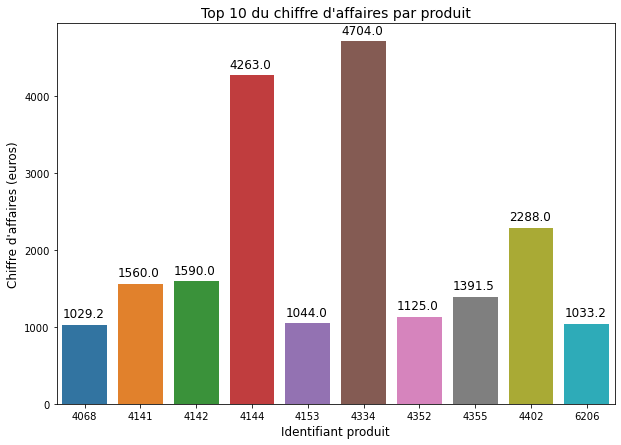

In [54]:
#Représentation graphique du top des chiffres d'affaires par produit
plt.figure(figsize=(10,7))
sns.barplot(data=top_ca_pdt, x='product_id', y='chiffre_affaires', ci=None)
plt.title("Top 10 du chiffre d'affaires par produit", fontsize=14)
plt.ylabel("Chiffre d'affaires (euros)", fontsize=12)
plt.xlabel("Identifiant produit", fontsize=12)

#affichage des valeurs au-dessus des barres
ca=top_ca_pdt.sort_values('product_id')
ca=ca['chiffre_affaires'].tolist()
for i in range(10):
    plt.text(i-0.4,ca[i]+100,ca[i],fontsize=12)
    
plt.show()

#### b. Chiffre d'affaires total réalisé en ligne<a class="anchor" id="3_2_2"></a>

In [55]:
# Calcul du chiffre d'affaires réalisé en ligne
print("")
print("Le chiffre d'affaires total réalisé en ligne est de "+str(round(df_final['chiffre_affaires'].sum()))+" euros.")


Le chiffre d'affaires total réalisé en ligne est de 70569 euros.


#### c. Top des ventes par produit<a class="anchor" id="3_2_3"></a>

In [56]:
#Top des ventes
df_final=df_final.sort_values('total_sales', ascending=False)
top_ventes_pdt=df_final[['product_id','sku','price','total_sales','chiffre_affaires']].iloc[:10]
display(top_ventes_pdt)

,product_id,sku,price,total_sales,chiffre_affaires
286,4334,7818,49.0,96.0,4704.0
162,4144,1662,49.0,87.0,4263.0
121,4068,16416,16.6,62.0,1029.2
210,4200,16295,5.8,46.0,266.8
188,4172,16210,5.7,43.0,245.1
200,4187,16189,13.3,42.0,558.6
761,6206,16580,25.2,41.0,1033.2
160,4141,304,39.0,40.0,1560.0
418,4729,38,8.6,38.0,326.8
734,6047,16264,10.9,38.0,414.2


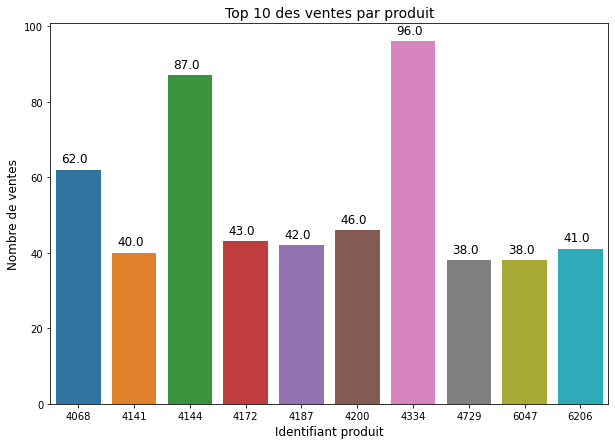

In [57]:
#Représentation graphique du top des ventes par produit
plt.figure(figsize=(10,7))
sns.barplot(data=top_ventes_pdt, x='product_id', y='total_sales', ci=None)
plt.title("Top 10 des ventes par produit", fontsize=14)
plt.ylabel("Nombre de ventes", fontsize=12)
plt.xlabel("Identifiant produit", fontsize=12)

#affichage des valeurs au-dessus des barres
top=top_ventes_pdt.sort_values('product_id')
top=top['total_sales'].tolist()
for i in range(10):
    plt.text(i-0.3,top[i]+2,top[i],fontsize=12)
    
plt.show()

### 3. Analyse des prix de produits<a class="anchor" id="3_3"></a>

**Objectif :** Identifier les erreurs de saisie de certains prix des produits: effectuer une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité

#### a. Données statistiques et premières visualisations<a class="anchor" id="3_3_1"></a>

In [58]:
#Création du série 'price'
price=df_final['price']

In [59]:
#Affichage de données statistiques de la variable 'price'
price.describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

75% des prix de ventes sont en dessous de 42.0 €.

Les prix de ventes sont compris entre 5,2 et 225.0 €.

Le diagramme en boîte à moustache et l'histogramme ci-dessous permettent d'illustrer ces résultats.

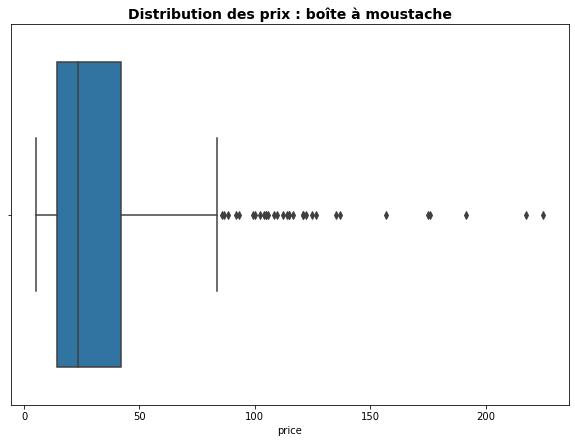

In [60]:
#Boîte à moustache de la variable 'prix'
plt.figure(figsize=(10,7))
sns.boxplot(data=df_final,x='price')
plt.title('Distribution des prix : boîte à moustache',fontsize=14, fontweight='bold')
plt.show()

Nous visualisons sur le diagramme en boîte à moustache les outliers : prix qui se situent au-dessus de le la limite haute de la boîte à moustaches.

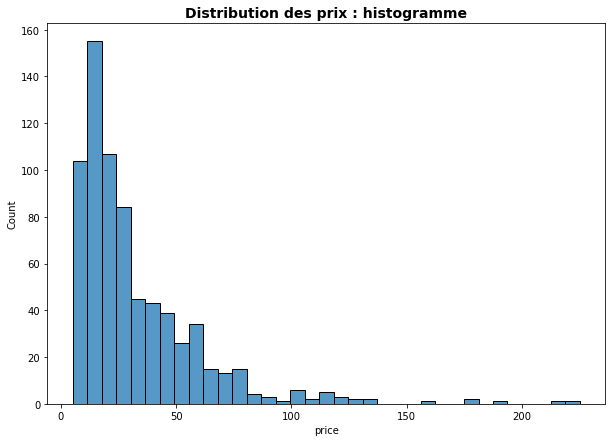

In [61]:
#Répartition des prix de ventes : histogramme
plt.figure(figsize=(10,7))
sns.histplot(data=df_final,x='price')
plt.title('Distribution des prix : histogramme',fontsize=14, fontweight='bold')
plt.show()

**Conclusion:**

Nous pouvons observer qu'il y a bien des valeurs aberrantes pour la variable 'price' du df 'erp'.

#### b. Détermination des outliers : méthode de  l'écart interquartile<a class="anchor" id="3_3_2"></a>

La première méthode utilisée pour déterminer les valeurs extrêmes, outliers, est celle de l'écart interquartile.

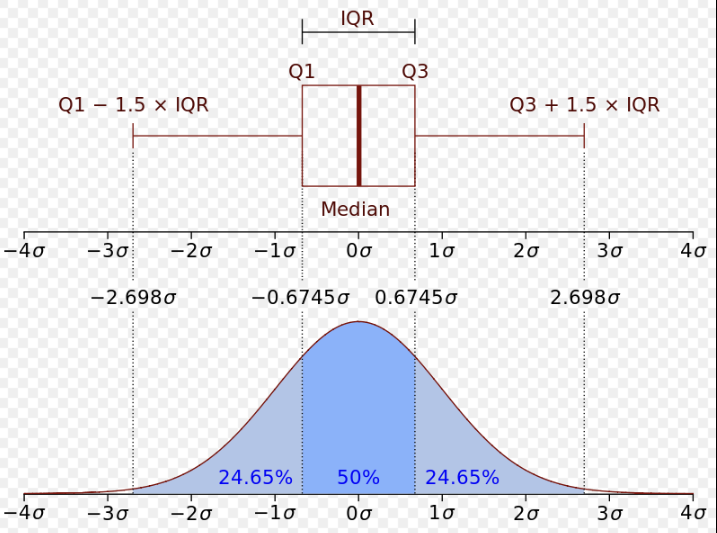


Les valeurs au-dessus ou au-desssous des limites basses et haute, $Q3-1.5xIQR$ et $Q3+1.5xIQR$, sont considérés comme des outliers.



In [62]:
#Tri de la série 'price' : fonction sorted()
price = sorted(price)

In [63]:
# Calcul de l'écart interquartile
q1, q3= np.percentile(price,[25,75])
iqr = q3 - q1
print("Q1 => " + str(q1))
print("Q3 => " + str(q3))
print("IQR => " + str(iqr))

Q1 => 14.1
Q3 => 42.175000000000004
IQR => 28.075000000000003


In [64]:
# Calcul des valeurs limites
lower_bound = round(q1 -(1.5 * iqr),2)
upper_bound = round(q3 +(1.5 * iqr),2)
print("")
print("Sont considérés comme outliers les prix en-dessous de la lower bound et ceux au-dessus de la upper bound :")
print("Lower_bound => " + str(lower_bound)+" euros")
print("Upper_bound => " + str(upper_bound)+" euros")
print("")


Sont considérés comme outliers les prix en-dessous de la lower bound et ceux au-dessus de la upper bound :
Lower_bound => -28.01 euros
Upper_bound => 84.29 euros



In [65]:
# Détermination des outliers
result = df_final[(df_final['price'] > upper_bound) | (df_final['price'] < lower_bound)]

# Affichage du résultat
print("")
print("Nombre d'outliers détectés => " + str(len(result)))
result[['product_id','sku','price','post_name']].sort_values('price')


Nombre d'outliers détectés => 32


,product_id,sku,price,post_name
297,4359,13853,85.6,champagne-larmandier-bernier-grand-cru-vieille...
539,5026,13913,86.8,champagne-agrapart-fils-mineral-extra-brut-bla...
156,4132,11668,88.4,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...
605,5565,19822,92.0,tempier-bandol-cabassaou-2017
707,5916,14774,93.0,wemyss-malts-single-cask-chocolate-moka-cake
765,6214,11601,99.0,domaine-des-comtes-lafon-volnay-1er-cru-champa...
154,4115,15382,100.0,zind-humbrecht-riesling-gc-rangen-thann-clos-s...
477,4903,14805,102.3,domaine-des-croix-corton-grand-cru-les-greves-...
314,4407,3509,104.0,cognac-frapin-cigar-blend
530,5007,12791,105.0,domaine-des-comtes-lafon-volnay-1er-cru-santen...


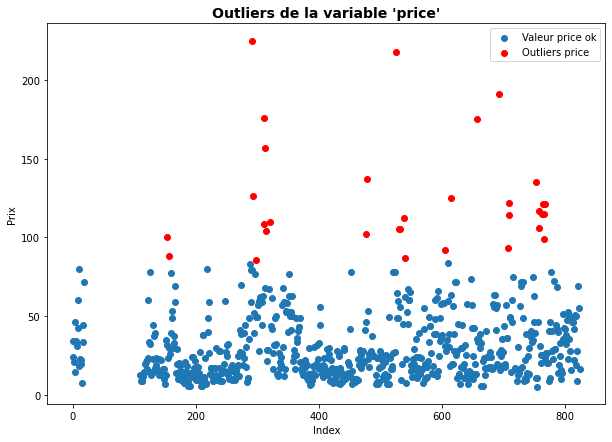

In [66]:
# Création de 2 data frames pour mettre en relief les outliers
only_ok = df_final[(df_final['price'] < upper_bound) & (df_final['price'] > lower_bound)]
only_outliers = df_final[(df_final['price'] > upper_bound) | (df_final['price'] < lower_bound)]

# Représentation graphique en nuage de points
plt.figure(figsize=(10,7))
line1=plt.scatter(only_ok['price'].index, only_ok['price'].values)
line2=plt.scatter(only_outliers['price'].index, only_outliers['price'].values,c='red')
plt.title("Outliers de la variable 'price'",fontsize=14, fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Prix')
plt.legend([line1,line2],['Valeur price ok','Outliers price'])
plt.show(line1,line2)

#### c. Détermination des outliers : méthode du Z-score<a class="anchor" id="3_3_3"></a>

La deuxième méthode utilisée pour déterminer les valeurs extrêmes, outliers, est celle du Z-score.

L'équation du score z est la suivante :  $z = (x – μ)/σ$

avec :
- x : variable
- $μ$ = moyenne des x
- $σ$ = écart-type de la variable x

Pour la détection des outliers, il faut définir un seuil à partir duquel les valeurs sont considérées comme outliers, ce seuil est le 'threshold'. C'est le nombre d'écart-type d'écart par rapport à la moyenne.

Le threshold peut être de 2, 2.5 ou 3.

In [67]:
#Création du série 'price'
price=df_final['price']

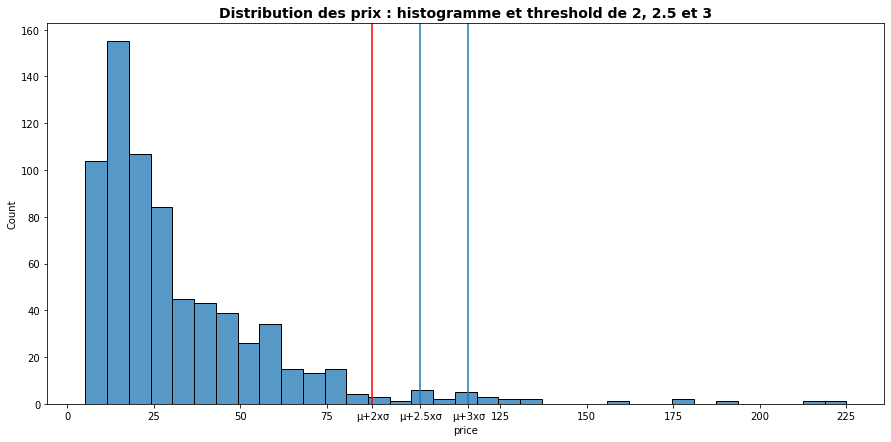

In [68]:
# Calcul de la moyenne et de l'écart-type de la serie 'price'
mean = np.mean(price)
std =np.std(price)

#Répartition des prix de ventes : histogramme + threshold 2, 2.5 et 3
plt.figure(figsize=(15,7))
sns.histplot(data=df_final,x='price')
plt.axvline(x=mean+2*std, c='red')
plt.axvline(x=mean+2.5*std)
plt.axvline(x=mean+3*std)
plt.xticks([0,25,50,75,mean+2*std,mean+2.5*std,mean+3*std,125,150,175,200,225],['0','25','50','75','μ+2xσ','μ+2.5xσ','μ+3xσ','125','150','175','200','225'])
plt.title('Distribution des prix : histogramme et threshold de 2, 2.5 et 3',fontsize=14, fontweight='bold')
plt.show()

Vu la distribution de la variable 'price', le threshold est pris à 2.

In [69]:
# Valeur limite haute de prix avec le threshold = 2
print("Les outliers seront les prix supérieurs à "+str(round(mean+2*std,2))+" euros.")

Les outliers seront les prix supérieurs à 88.08 euros.


In [70]:
# Création d'une fonction pour lister les prix considérés comme outliers
outliers=[] # création d'une liste vide
def detectOutlier(data):
    threshold=2
    mean = np.mean(data)# calcul de la moyenne
    std =np.std(data)#calcul de l'écart-type
   
    for i in data:
        z_score = (i - mean)/std#calcul du z-score
        if np.abs(z_score) > threshold: #valeur absolue du z-score
            outliers.append(i) # ajout de i dans la liste
    return outliers

#Application de la fonction à la série 'price'
priceOutliers = detectOutlier(price)

#affichage des outliers détectés
print("Nombre d'outliers détectés => " + str(len(priceOutliers)))
print(priceOutliers)
df_final.loc[df_final['price'].isin(priceOutliers),['product_id','sku','price','post_name']].sort_values('price')

Nombre d'outliers détectés => 30
[176.0, 126.5, 137.0, 225.0, 191.3, 135.0, 108.5, 115.0, 104.0, 112.0, 105.0, 105.0, 100.0, 88.4, 217.5, 102.3, 92.0, 116.4, 121.0, 99.0, 115.0, 121.0, 175.0, 124.8, 105.6, 109.6, 157.0, 93.0, 122.0, 114.0]


,product_id,sku,price,post_name
156,4132,11668,88.4,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...
605,5565,19822,92.0,tempier-bandol-cabassaou-2017
707,5916,14774,93.0,wemyss-malts-single-cask-chocolate-moka-cake
765,6214,11601,99.0,domaine-des-comtes-lafon-volnay-1er-cru-champa...
154,4115,15382,100.0,zind-humbrecht-riesling-gc-rangen-thann-clos-s...
477,4903,14805,102.3,domaine-des-croix-corton-grand-cru-les-greves-...
314,4407,3509,104.0,cognac-frapin-cigar-blend
531,5008,11602,105.0,domaine-des-comtes-lafon-volnay-1er-cru-santen...
530,5007,12791,105.0,domaine-des-comtes-lafon-volnay-1er-cru-santen...
757,6201,14596,105.6,david-duband-chambolle-musigny-1er-cru-les-sen...


#### d. Conclusion : liste des potentiels outliers<a class="anchor" id="3_3_4"></a>

Les outliers de la variable 'price' sont : 
- avec la méthode de l'écart interquartile, les prix supérieurs à 84.29€ et il y a 32 outliers.
- avec la méthode du z-score, les prix supérieurs à  88,08 € et il y a 30 outliers.

La liste potentielle des 32 outliers est la suivante :

In [71]:
result[['product_id','sku','price','post_name']].sort_values('price')

,product_id,sku,price,post_name
297,4359,13853,85.6,champagne-larmandier-bernier-grand-cru-vieille...
539,5026,13913,86.8,champagne-agrapart-fils-mineral-extra-brut-bla...
156,4132,11668,88.4,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...
605,5565,19822,92.0,tempier-bandol-cabassaou-2017
707,5916,14774,93.0,wemyss-malts-single-cask-chocolate-moka-cake
765,6214,11601,99.0,domaine-des-comtes-lafon-volnay-1er-cru-champa...
154,4115,15382,100.0,zind-humbrecht-riesling-gc-rangen-thann-clos-s...
477,4903,14805,102.3,domaine-des-croix-corton-grand-cru-les-greves-...
314,4407,3509,104.0,cognac-frapin-cigar-blend
530,5007,12791,105.0,domaine-des-comtes-lafon-volnay-1er-cru-santen...


Ci-dessous les représentations graphiques du prix, sans les outliers (méthode de l'écart interquartile).

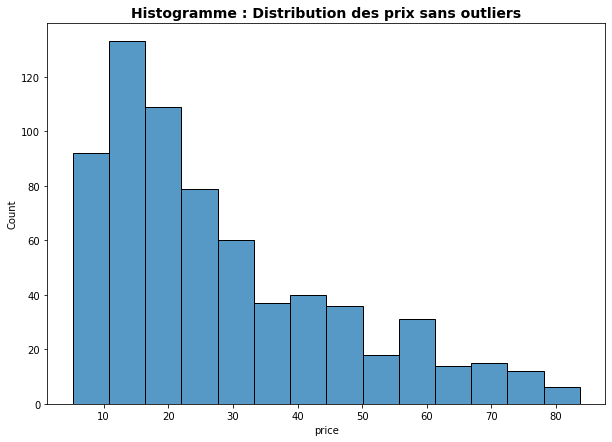

In [72]:
#Répartition des prix de ventes : histogramme
plt.figure(figsize=(10,7))
sns.histplot(data=only_ok,x='price')
plt.title('Histogramme : Distribution des prix sans outliers',fontsize=14, fontweight='bold')
plt.show()

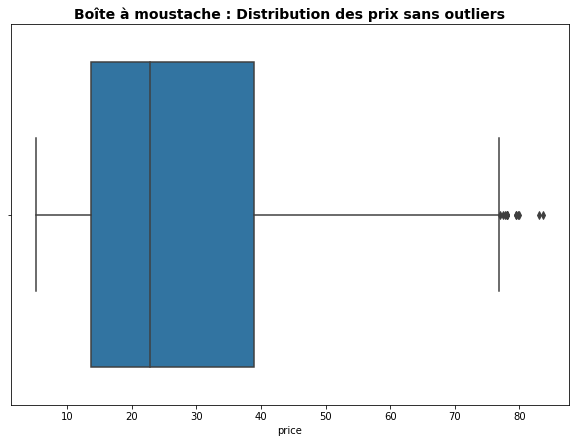

In [73]:
#Boîte à moustache de la variable 'prix'
plt.figure(figsize=(10,7))
sns.boxplot(data=only_ok,x='price')
plt.title('Boîte à moustache : Distribution des prix sans outliers',fontsize=14, fontweight='bold')
plt.show()

#### e. Analyse des potentiels outliers<a class="anchor" id="3_3_5"></a>

Dans les potentiels outliers, il y a notamment : 
- 4 cognacs Frapin dont les prix sont entre 106€ et 187€ sur le [site internet des cognacs Frapin](https://www.cognac-frapin.com/fr/) 
- 7 Domaine des comtes Lafon volnay 1er cru dont les prix sont autour de 135€ sur ce [site internet](https://www.vinsetmillesimes.com/fr/4409-comtes-lafon/s-1/appellation-volnay_1er_cru/domaine-comtes_lafon)
- 3 Wemyss malts single cask dont les prix vont de 166€ à 690€ sur le [site internet Wemyss](https://wemyssmalts.com/en-eu/collections/single-cask-collection)

qui ne sont pas des valeurs aberrantes.

Une analyse plus poussée est donc à réaliser pour identifier les erreurs de saisie.

In [74]:
result[['product_id','sku','price','post_name']].sort_values('post_name')

,product_id,sku,price,post_name
657,5767,15185,175.0,camille-giroud-clos-de-vougeot-2016
538,5025,13914,112.0,champagne-agrapart-fils-lavizoise-grand-cru-20...
539,5026,13913,86.8,champagne-agrapart-fils-mineral-extra-brut-bla...
293,4355,12589,126.5,champagne-egly-ouriet-grand-cru-brut-blanc-de-...
291,4352,15940,225.0,champagne-egly-ouriet-grand-cru-millesime-2008
752,6126,14923,135.0,champagne-gosset-celebris-vintage-2007
297,4359,13853,85.6,champagne-larmandier-bernier-grand-cru-vieille...
320,4582,12857,109.6,chateau-de-puligny-montrachet-1cru-champ-canet...
313,4406,7819,157.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans
314,4407,3509,104.0,cognac-frapin-cigar-blend
